In [1]:
import pandas as pd
import numpy as np

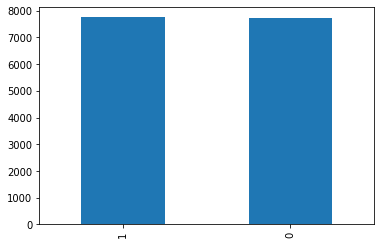

In [90]:
train_data = pd.read_csv('./all_data/train_data_11_15.csv', encoding='utf-8-sig')
test_data = pd.read_csv('./all_data/test_data_11_15.csv', encoding='utf-8-sig')



train_data.score.value_counts().plot(kind='bar')

In [91]:
train_data.tail()

,review,score
15455,예약이 어렵다는 마렘마 운좋게 당일 6시 예약! 그러나 ㅋㅋ1시간 시간제한이 있었어...,0
15456,마카롱이 쪽득쫀득하고 맛있는곳,0
15457,"음식은 괜츈하지만 환기가 전혀안됨\n음식먹다 질식할뻔, 쾌적함에 민감한 사람은 근처...",0
15458,그러나 맛과 분위기에 빠져들다 보면 가격이 비싼것도 무마되는곳입니다 ㅎㅎ 자주 방문...,1
15459,개인적으로 엔제리너스 커피 음... 서울역에 카페가 항상 만석이라서ㅜ 엔제리너스 역...,0


In [3]:
print(train_data.shape)
print(test_data.shape)


print(train_data['review'].size)
print(test_data['review'].size)

(15460, 2)
(1718, 2)
15460
1718


In [4]:
train_data.head()

,review,score
0,과카몰리 프라이즈 / 더블 더블 버거 / 아보카도 버거,0
1,Nahhhh 별로임 피스타치오랑 에스프레소 였나 뭐 먹었는데 걍 그저그럼 식감도 그...,0
2,"삼선이라고 붙은 메뉴들은 맛이 나쁘지 않지만 가격이 비싼 편이고, 일반 짜장면이나 ...",0
3,이 지점 은 별로 붐비지 않아서 좋고 커피 보다는 다른 차와 간단한 스낵류가 개인적...,1
4,"음식도 깔끔하고 인테리어도 잘되어 있음. 맛이 있으며, 가격대비 상당히 만족스러운 ...",1


In [5]:
test_data.head()

,review,score
0,일본에선 코코이찌방밖에 못찾아 아쉽게도 아비꼬는 한국에서 먹어보게 되었다. 합리적인...,1
1,제가 읽은 좋은 리뷰가 기대 이상이었습니다. 음식은 좋지만. 다양한 종류의 샐러드가...,0
2,11시 오픈인데 10시 50분 정도에도 이미 기다리는 분들이 있었습니다 ; 매장이 ...,0
3,야미요밀 진짜 맛있긴 한데 4.3 이라니 ㄷㄷㄷ.. 물론 가성비 최고고 비건인데 맛...,1
4,우리는 우리의 사랑을 해! 브런치 도 정말 좋고 발코니에 앉아 이 너무 좋다. 내 ...,1


## Review to wordlist 

- remove stop word
- use okt tokenize

In [6]:
from Word2VecUtility import Word2VecUtility

In [7]:
Word2VecUtility.review_to_wordlist(train_data['review'][1])[:10]

C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['별로', '임', '피스타치오', '랑', '에스프레소', '이다', '뭐', '먹다', '걍', '그저']

### Make clean sentence

In [13]:
train_clean_sentences = list(map(lambda x: Word2VecUtility.review_to_wordlist(x), train_data['review']))

In [14]:
train_clean_sentences[:10]

[['과카', '몰리', '프라', '이즈', '더블', '더블', '버거', '아보카도', '버거'],
 ['별로',
  '임',
  '피스타치오',
  '랑',
  '에스프레소',
  '이다',
  '뭐',
  '먹다',
  '걍',
  '그저',
  '그렇다',
  '식',
  '감다',
  '그렇다',
  '맛',
  '도',
  '풍부하다',
  '않다',
  '근데',
  '서비스',
  '는',
  '좋다'],
 ['삼선',
  '이라고',
  '붙다',
  '메뉴',
  '들',
  '은',
  '맛',
  '이',
  '나쁘다',
  '않다',
  '가격',
  '이',
  '비싸다',
  '편이',
  '고',
  '일반',
  '짜장면',
  '이나',
  '일반',
  '짬뽕',
  '늘다',
  '냉동',
  '재료',
  '를',
  '써다',
  '별로',
  '맛있다',
  '느낌',
  '이',
  '들다',
  '않다',
  '점심때',
  '항상',
  '사람',
  '이',
  '많다',
  '왜',
  '사람',
  '이',
  '많다',
  '이해',
  '가',
  '자다',
  '안되다',
  '곳',
  '가운데',
  '하나',
  '이다'],
 ['이',
  '지점',
  '은',
  '별로',
  '붐비다',
  '않다',
  '좋다',
  '커피',
  '보다는',
  '다른',
  '차',
  '와',
  '간단하다',
  '스낵',
  '류',
  '가',
  '개인',
  '적',
  '으로는',
  '좋다'],
 ['음식',
  '도',
  '깔끔하다',
  '인테리어',
  '도',
  '잘',
  '되어다',
  '있다',
  '맛',
  '이',
  '있다',
  '가격',
  '대비',
  '상당하다',
  '만족스럽다',
  '음식',
  '을',
  '제',
  '공함',
  '사람',
  '이',
  '많다',
  '좌석',
  '이',
  '복잡하다',
  '빼다',
  '괜찮다',
  

In [15]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [17]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(train_clean_sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2019-11-20 20:52:02,579 : INFO : collecting all words and their counts
2019-11-20 20:52:02,580 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-20 20:52:02,727 : INFO : PROGRESS: at sentence #10000, processed 612749 words, keeping 18314 word types
2019-11-20 20:52:02,818 : INFO : collected 21976 word types from a corpus of 940772 raw words and 15460 sentences
2019-11-20 20:52:02,819 : INFO : Loading a fresh vocabulary
2019-11-20 20:52:02,834 : INFO : effective_min_count=40 retains 2238 unique words (10% of original 21976, drops 19738)
2019-11-20 20:52:02,835 : INFO : effective_min_count=40 leaves 842483 word corpus (89% of original 940772, drops 98289)
2019-11-20 20:52:02,843 : INFO : deleting the raw counts dictionary of 21976 items
2019-11-20 20:52:02,845 : INFO : sample=0.001 downsamples 61 most-common words
2019-11-20 20:52:02,845 : INFO : downsampling leaves estimated 650703 word corpus (77.2% of prior 842483)
2019-11-20 20:52:02,853 : INFO : esti

In [18]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2019-11-20 20:52:19,090 : INFO : precomputing L2-norms of word weight vectors
2019-11-20 20:52:19,095 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2019-11-20 20:52:19,097 : INFO : not storing attribute vectors_norm
2019-11-20 20:52:19,098 : INFO : not storing attribute cum_table
2019-11-20 20:52:19,157 : INFO : saved 300features_40minwords_10text


### Exploratory Model


#### 유사도가 없는 단어 추출

In [20]:
model.wv.doesnt_match('나는 너무 배가 코프당'.split())

2019-11-20 20:52:48,908 : WARNING : vectors for words {'코프당', '나는', '배가'} are not present in the model, ignoring these words
C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'너무'

In [21]:
model.wv.doesnt_match("오늘 돈가네 너무 꿀맛 역시 고기가 최고".split())

2019-11-20 20:53:08,475 : WARNING : vectors for words {'돈가네', '고기가'} are not present in the model, ignoring these words


'너무'

#### 가장 유사한 단어를 추출

In [22]:
model.wv.most_similar("고기")

[('김치', 0.8137902617454529),
 ('양념', 0.7738972902297974),
 ('돼지', 0.758394181728363),
 ('돼지고기', 0.7510430812835693),
 ('소스', 0.7480180263519287),
 ('질', 0.7456825375556946),
 ('상태', 0.7222574353218079),
 ('닭고기', 0.7202495336532593),
 ('국물', 0.7186218500137329),
 ('부위', 0.717765212059021)]

In [23]:
model.wv.most_similar("커피")

[('라떼', 0.8213275671005249),
 ('음료', 0.7946557998657227),
 ('원두', 0.7911272644996643),
 ('아메리카노', 0.7629014253616333),
 ('마시다', 0.694648265838623),
 ('드립', 0.6902950406074524),
 ('드립커피', 0.6846975088119507),
 ('핸드', 0.6743830442428589),
 ('아이스', 0.6723871827125549),
 ('마시기', 0.670570969581604)]

In [29]:
model.wv.most_similar("치") 

[('정리', 0.6942277550697327),
 ('오지', 0.6578020453453064),
 ('인하다', 0.6554998755455017),
 ('돌아가다', 0.6549521684646606),
 ('가까이', 0.6464226245880127),
 ('발렛', 0.6460007429122925),
 ('돌다', 0.6377807855606079),
 ('불쾌하다', 0.6362069249153137),
 ('결코', 0.6355266571044922),
 ('지도', 0.63044273853302)]

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [30]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2019-11-20 20:55:25,858 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2019-11-20 20:55:25,909 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2019-11-20 20:55:25,911 : INFO : setting ignored attribute vectors_norm to None
2019-11-20 20:55:25,911 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2019-11-20 20:55:25,912 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2019-11-20 20:55:25,913 : INFO : setting ignored attribute cum_table to None
2019-11-20 20:55:25,914 : INFO : loaded 300features_40minwords_10text
C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


2238
[-0.10280141  0.0029384  -0.05596799 -0.08781978  0.06400931 -0.01224261
 -0.01507921 -0.01631313 -0.01152856 -0.02206977]


In [31]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [33]:
df.head(10)

,x,y
과카,5.049896,3.911932
몰리,4.992159,4.075616
프라,4.658250,3.292644
이즈,5.003673,2.856261
더블,5.331948,3.039095
버거,6.470691,4.399792
아보카도,5.862441,3.858102
별로,1.097762,-0.610586
임,3.138421,-3.285877
피스타치오,5.070419,1.680464


In [61]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [120]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [121]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = Word2VecUtility.apply_by_multiprocessing(\
        reviews["review"], Word2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

## Make Data vector

---

In [122]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train_data), model, num_features )

Review 0 of 15460


C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Review 1000 of 15460
Review 2000 of 15460
Review 3000 of 15460
Review 4000 of 15460
Review 5000 of 15460
Review 6000 of 15460
Review 7000 of 15460
Review 8000 of 15460
Review 9000 of 15460
Review 10000 of 15460
Review 11000 of 15460
Review 12000 of 15460
Review 13000 of 15460
Review 14000 of 15460
Review 15000 of 15460
Wall time: 58.6 s


In [162]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test_data), model, num_features )

Review 0 of 1718


C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\skeks\.conda\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Review 1000 of 1718
Wall time: 17.7 s


In [126]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

### Drop Word to vector Nan value
---

In [127]:
len(trainDataVecs)

15460

In [176]:
train_df = pd.DataFrame(trainDataVecs)

In [177]:
# merge score field

train_df['score'] = train_data['score'].values

In [178]:
# drop na value

train_df = train_df.dropna()

In [179]:
# get word2vec_data
train_word2vec = df1.drop(['score'],axis=1)

In [180]:
%time forest = forest.fit(word2vec_train_data, train_df['score'].values)

Wall time: 4.47 s


In [181]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, df2, \
    df1['score'], cv=10, scoring='roc_auc'))

Wall time: 1min 6s


In [182]:
score

0.8220375075760525

#### Drop Word to vector Nan value(test data)

In [187]:
test_df = pd.DataFrame(testDataVecs)

In [188]:
test_df['score'] = test_data['score']

In [189]:
test_df = test_df.dropna()

In [190]:
test_word2vec = test_df.drop(['score'], axis=1)

In [192]:
predict_result = forest.predict(test_word2vec)

In [193]:
predict_result

array([1., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [194]:
correct_result = np.array(test_df['score'].values)
correct_result

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### Check Test data accuracy

In [195]:
test_prediction = [1 if predict_result[i] == correct_result[i] else 0 for i in range(len(real))]

sum(test_prediction) / len(test_prediction)

0.7209715639810427